In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16

Using TensorFlow backend.


In [0]:
# read the input file
def read_files(directory):
    import glob
    mylist = [f for f in glob.glob(directory)]
    mylist.sort()
    d_len = len(mylist)
    print('files are:',mylist)
    def unpickle(file):
        import pickle
        with open(file, 'rb') as fo:
            cifar_dict = pickle.load(fo, encoding='bytes')
        return cifar_dict
    all_data = []
        
    for i,direc in zip(range(d_len),mylist):
        all_data.append(unpickle(mylist[i]))
    return all_data

In [3]:
all_data = read_files('/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/*_batch*')

files are: ['/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/data_batch_1', '/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/data_batch_2', '/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/data_batch_3', '/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/data_batch_4', '/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/data_batch_5', '/content/drive/My Drive/Colab Notebooks/cifar10_vgg/input/test_batch']


In [0]:
data_batch1 = all_data[0]
data_batch2 = all_data[1]
data_batch3 = all_data[2]
data_batch4 = all_data[3]
data_batch5 = all_data[4]
test_batch =  all_data[5]

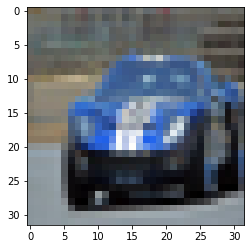

In [5]:
X = data_batch5[b"data"] 
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
_=plt.imshow(X[518])

In [6]:
for i in range(len(all_data)):
    print('data_batch{}: {}'.format(i,all_data[i][b'batch_label']))

data_batch0: b'training batch 1 of 5'
data_batch1: b'training batch 2 of 5'
data_batch2: b'training batch 3 of 5'
data_batch3: b'training batch 4 of 5'
data_batch4: b'training batch 5 of 5'
data_batch5: b'testing batch 1 of 1'


In [0]:
# Train images and labels
all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
#test_batch = [test_batch]
training_images = np.concatenate([d[b"data"] for d in all_train_batches],axis=0)
training_labels = np.hstack([d[b"labels"] for d in all_train_batches])
training_labels_encoded = to_categorical(training_labels)

In [0]:
# Test images and labels
test_images = test_batch[b"data"]
test_labels = test_batch[b'labels']
test_labels_encoded = to_categorical(test_labels)

In [0]:
training_images = training_images.reshape(len(training_images),3,32,32).transpose(0,2,3,1)/255
test_images = test_images.reshape(len(test_images),3,32,32).transpose(0,2,3,1)/255

In [0]:
def vgg3_without_dropout(opt):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform',input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    #model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    #model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    #model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(units=128,activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    #model.add(Dropout(0.3))

    model.add(Dense(units=10,activation='softmax', kernel_initializer='glorot_uniform'))
    opt = opt
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], )
    return model

In [11]:
opt = SGD(lr=0.001, momentum=0.9)
model = vgg3_without_dropout(opt)
history = model.fit(training_images, training_labels_encoded, validation_data=(test_images, test_labels_encoded), 
                                                                             batch_size=100, epochs=100, verbose=1).history

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 227us/sample - loss: 2.0801 - acc: 0.3385 - val_loss: 1.7937 - val_acc: 0.4481
Epoch 2/100
50000/50000 [==============================] - 5s 103us/sample - loss: 1.7364 - acc: 0.4692 - val_loss: 1.6247 - val_acc: 0.5054
Epoch 3/100
50000/50000 [==============================] - 5s 102us/sample - loss: 1.5818 - acc: 0.5258 - val_loss: 1.4990 - val_acc: 0.5548
Epoch 4/100
50000/50000 [==============================] - 5s 103us/sample - loss: 1.4545 - acc: 0.5706 - val_loss: 1.4080 - val_acc: 0.5863
Epoch 5/100
50000/50000 [==============================] - 5s 104us/sample - loss: 1.3535 - acc: 0.6049 - val_loss: 1.3387 - val_acc: 0.6087
Epoch 6/100
50000/50000 [==============================] - 5s 103us/sample - loss: 1.2571 - acc: 0.6410 - val_loss: 1.3276 - val_acc: 0.6137
Epoch 7/100
50000/5000

In [12]:
loss, acc = model.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test accuracy without dropout', acc)

Test accuracy without dropout 0.7293


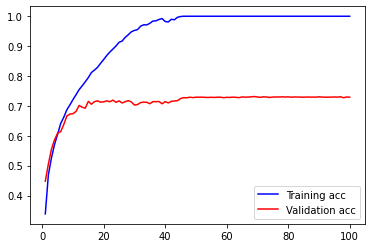

In [13]:
# cleary overfitting without Droput
plt.plot(range(1,101),history['acc'], 'b', label='Training acc')
plt.plot(range(1,101),history['val_acc'], 'r', label='Validation acc')
plt.legend()

In [0]:
# vgg with 3 layers and drop out
def vgg3(opt):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform',input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu', 
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(units=128,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))

    model.add(Dense(units=10,activation='softmax', kernel_initializer='glorot_uniform'))
    opt = opt
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], )
    return model

In [15]:
opt = SGD(lr=0.001, momentum=0.9)
model = vgg3(opt)
history = model.fit(training_images, training_labels_encoded, validation_data=(test_images, test_labels_encoded), 
                                                                          batch_size=100, epochs=100, verbose=1).history

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 121us/sample - loss: 2.0670 - acc: 0.2197 - val_loss: 1.7640 - val_acc: 0.3648
Epoch 2/100
50000/50000 [==============================] - 6s 117us/sample - loss: 1.7431 - acc: 0.3523 - val_loss: 1.6092 - val_acc: 0.4126
Epoch 3/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.6171 - acc: 0.4054 - val_loss: 1.4889 - val_acc: 0.4620
Epoch 4/100
50000/50000 [==============================] - 6s 117us/sample - loss: 1.5234 - acc: 0.4412 - val_loss: 1.3871 - val_acc: 0.5045
Epoch 5/100
50000/50000 [==============================] - 6s 116us/sample - loss: 1.4483 - acc: 0.4705 - val_loss: 1.3319 - val_acc: 0.5248
Epoch 6/100
50000/50000 [==============================] - 6s 115us/sample - loss: 1.3836 - acc: 0.4928 - val_loss: 1.2637 - val_acc: 0.5469
Epoch 7/100
50000/50000 [==============================] - 6s 115us/sample - loss: 1.3323 - acc: 0.5176 

In [16]:
loss, acc = model.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test accuracy with dropout', acc)

Test accuracy with dropout 0.8261


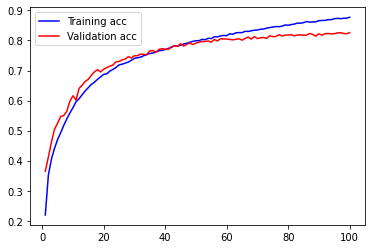

In [17]:
plt.plot(range(1,101),history['acc'], 'b', label='Training acc')
plt.plot(range(1,101),history['val_acc'], 'r', label='Validation acc')
plt.legend()

In [0]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(training_images, training_labels_encoded, batch_size=64)

In [19]:
# train without dropout and data Augmentation
opt = SGD(lr=0.001, momentum=0.9)
model = vgg3_without_dropout(opt)

# fit model
steps = int(training_images.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=50, validation_data=(test_images, 
                                                                                           test_labels_encoded), verbose=2).history

Epoch 1/50
Epoch 1/50
10000/781 - 1s - loss: 1.6634 - acc: 0.4465
781/781 - 21s - loss: 2.0606 - acc: 0.3457 - val_loss: 1.7861 - val_acc: 0.4465
Epoch 2/50
Epoch 1/50
10000/781 - 1s - loss: 1.4730 - acc: 0.5108
781/781 - 21s - loss: 1.7197 - acc: 0.4694 - val_loss: 1.5943 - val_acc: 0.5108
Epoch 3/50
Epoch 1/50
10000/781 - 1s - loss: 1.2702 - acc: 0.5705
781/781 - 21s - loss: 1.5777 - acc: 0.5248 - val_loss: 1.4363 - val_acc: 0.5705
Epoch 4/50
Epoch 1/50
10000/781 - 1s - loss: 1.3400 - acc: 0.5938
781/781 - 21s - loss: 1.4671 - acc: 0.5624 - val_loss: 1.3800 - val_acc: 0.5938
Epoch 5/50
Epoch 1/50
10000/781 - 1s - loss: 1.1717 - acc: 0.6254
781/781 - 21s - loss: 1.3721 - acc: 0.5913 - val_loss: 1.2807 - val_acc: 0.6254
Epoch 6/50
Epoch 1/50
10000/781 - 1s - loss: 1.1594 - acc: 0.6614
781/781 - 21s - loss: 1.2991 - acc: 0.6209 - val_loss: 1.1972 - val_acc: 0.6614
Epoch 7/50
Epoch 1/50
10000/781 - 1s - loss: 1.1280 - acc: 0.6463
781/781 - 21s - loss: 1.2382 - acc: 0.6424 - val_loss: 1.2

In [20]:
loss, acc = model.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test accuracy with data augmentation', acc)

Test accuracy with data augmentation 0.8216


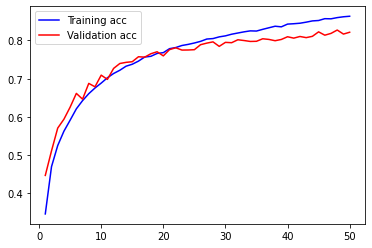

In [21]:
plt.plot(range(1,51),history['acc'], 'b', label='Training acc')
plt.plot(range(1,51),history['val_acc'], 'r', label='Validation acc')
plt.legend()